# Análise de Reviews de Jogos da Steam

### Instalando as dependencias necessárias


In [216]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install matplotlip
# %pip install re
%pip install wordcloud

#Bibliotecas de NLP
%pip install nltk
from nltk import tokenize 

%pip install -U pip setuptools wheel
%pip install -U spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 KB 1.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=154356 sha256=aeba3d6cab0cd18b1d615747841694e4e86d1e9593e7c30f30b3d2201d966ff4
  Stored in directory: /Users/gabrielamedeirosdasilva/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 7.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [179]:
%pip install spacy
!python -m spacy download en

Note: you may need to restart the kernel to use updated packages.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [180]:
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libs adicionais de NLP 
import spacy 
import nltk
import re

### Dataset e Informacoes 

In [181]:
df = pd.read_csv("train.csv")

In [182]:
df.head(5) #Exibindo os 5 primeiros registros

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [183]:
#Todos os jogos presentes no dataset 
df['title'].unique()

array(["Spooky's Jump Scare Mansion", 'Sakura Clicker', 'WARMODE',
       'Fractured Space', 'Dota 2', 'Path of Exile', 'War Thunder',
       'Ring of Elysium', 'Team Fortress 2', 'Yu-Gi-Oh! Duel Links',
       'SMITE®', 'Brawlhalla', 'World of Tanks Blitz',
       'DCS World Steam Edition', 'Heroes & Generals',
       'The Elder Scrolls®: Legends™', 'Trove', 'Neverwinter',
       'Realm Royale', 'PlanetSide 2', 'Realm of the Mad God', 'Elsword',
       'theHunter Classic', 'Eternal Card Game', 'Black Squad',
       'Freestyle 2: Street Basketball', 'Bless Online',
       'RaceRoom Racing Experience', 'Fallout Shelter',
       'Tactical Monsters Rumble Arena', 'Creativerse', 'Dreadnought',
       'Infestation: The New Z', 'Shop Heroes', 'Robocraft',
       'Business Tour - Board Game with Online Multiplayer',
       'Crusaders of the Lost Idols', 'AdventureQuest 3D',
       'Realm Grinder', 'World of Guns: Gun Disassembly',
       'Bloons TD Battles', 'Cuisine Royale', 'School of Drago

In [184]:
df.shape

(17494, 5)

In [185]:
df.columns

Index(['review_id', 'title', 'year', 'user_review', 'user_suggestion'], dtype='object')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


## Tratando os Dados

* Retirando os valores nulos
* Retirando os caracteres especiais

### Retirando os Nulos

In [187]:
df.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [188]:
df[df['year'].isnull()]

,review_id,title,year,user_review,user_suggestion
1027,1028,Fractured Space,NaN,its really sad how this game ended. This game ...,1
1642,2106,Dota 2,NaN,"2 is one of the deepest, most satisfying and e...",1
1811,2275,Dota 2,NaN,has got to be one of the games with the worst ...,0
1814,2278,Dota 2,NaN,has long been a favorite game of mine. i have ...,0
1888,2352,Dota 2,NaN,is quick to ban racism from china but when rac...,0
...,...,...,...,...,...
17060,25029,Cuisine Royale,NaN,"Access ReviewNOT recomended 2play . Well , qui...",0
17073,25042,Cuisine Royale,NaN,Access ReviewQuite Possibly the worst BR game ...,0
17123,25092,Cuisine Royale,NaN,Access ReviewCant Playyyyyyyyyyyyyyyyyyyyyyyyy...,0
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [240]:
#Retirando linhas com valores inexistentes
df.dropna(how = 'any', inplace=True, axis = 1)

(17494, 5)

In [238]:
df.isnull().sum()

review_id          0
title              0
user_review        0
user_suggestion    0
scores             0
dtype: int64

### Retirando caracteres especiais

* *Marcação POS (Part-of-Speech)*

In [192]:
nlp = spacy.load('en_core_web_sm')
nlp

In [212]:
texto_teste = nlp(df['user_review'])

ValueError: [E866] Expected a string or 'Doc' as input, but got: <class 'pandas.core.series.Series'>.

In [194]:
for token in texto_teste:
    print(token.text, token.pos_)

I PRON
am AUX
currently ADV
learning VERB
Natural PROPN
Processing PROPN
Language PROPN


* *Lematização*

In [195]:
for token in texto_teste:
    print(token.text, token.lemma_)

I I
am be
currently currently
learning learn
Natural Natural
Processing Processing
Language Language


### Manipulação dos Dados

In [196]:
df['user_review'] = df['user_review'].astype('string')

In [197]:
reviews = df['user_review']

In [198]:
reviews

0        I'm scared and hearing creepy voices.  So I'll...
1        Best game, more better than Sam Pepper's YouTu...
2        A littly iffy on the controls, but once you kn...
3        Great game, fun and colorful and all that.A si...
4        Not many games have the cute tag right next to...
                               ...                        
17489    Arguably the single greatest mmorp that exists...
17490    An older game, to be sure, but has its own cha...
17491    When I frist started playing Everquest 2 it wa...
17492    cool game. THe only thing that REALLY PISSES M...
17493    this game since I was a little kid, always hav...
Name: user_review, Length: 17494, dtype: string

In [200]:
reviews.dtypes

string[python]

In [199]:
df.dtypes

review_id           int64
title              object
user_review        string
user_suggestion     int64
dtype: object

#### Nuvem de Palavras

In [233]:
reviews.tolist()

["I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",
 "Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons

In [214]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'blue', 'red', 'magenta'])


In [218]:
from wordcloud import WordCloud
cloud = WordCloud(background_color= 'black', max_words = 100, colormap = color_map)

In [235]:
import matplotlib.pyplot as plt
cloud = cloud.generate(reviews)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object

## Análise Exploratória

In [244]:
titulos = df['title'].value_counts()
titulos

Robocraft                                             842
Eternal Card Game                                     791
Heroes & Generals                                     745
War Thunder                                           720
Fractured Space                                       718
Bless Online                                          712
The Elder Scrolls®: Legends™                          565
Neverwinter                                           546
AdventureQuest 3D                                     519
theHunter Classic                                     518
Creativerse                                           492
DCS World Steam Edition                               488
Team Fortress 2                                       479
Infestation: The New Z                                479
PlanetSide 2                                          472
Path of Exile                                         458
SMITE®                                                454
Fallout Shelte

In [255]:
#Qtde de jogos recomendados (1) e não recomendados (0)
classificacao = df['user_suggestion'].value_counts()
classificacao

1    9968
0    7526
Name: user_suggestion, dtype: int64

/Users/gabrielamedeirosdasilva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


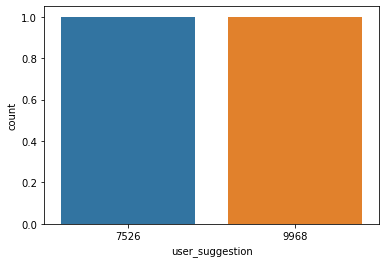

In [256]:
sns.countplot(classificacao)
plt.show()

In [257]:
#Variavel que armazena todos os jogos recomendados

recomendados = df[df['user_suggestion']==1]
nao_recomendados = df[df['user_suggestion']==0]


In [258]:
titulo_nao_recomendado = nao_recomendados['title'].value_counts()
titulo_nao_recomendado

Robocraft                                             794
Heroes & Generals                                     663
War Thunder                                           598
Bless Online                                          561
Infestation: The New Z                                350
Eternal Card Game                                     296
theHunter Classic                                     288
Cuisine Royale                                        249
Trove                                                 235
Neverwinter                                           235
AdventureQuest 3D                                     222
RaceRoom Racing Experience                            222
The Elder Scrolls®: Legends™                          220
Yu-Gi-Oh! Duel Links                                  210
Dota 2                                                202
Fallout Shelter                                       178
World of Tanks Blitz                                  166
Realm Royale  

In [254]:
titulo_recomendado = recomendados['title'].value_counts()
titulo_recomendado

Fractured Space                                       688
Eternal Card Game                                     495
Creativerse                                           443
PlanetSide 2                                          423
Path of Exile                                         415
DCS World Steam Edition                               394
Ring of Elysium                                       367
Team Fortress 2                                       365
Brawlhalla                                            355
The Elder Scrolls®: Legends™                          345
Spooky's Jump Scare Mansion                           321
Neverwinter                                           311
SMITE®                                                308
AdventureQuest 3D                                     297
Realm Royale                                          276
Realm of the Mad God                                  273
Fallout Shelter                                       269
Black Squad   

In [263]:
jogos = pd.concat([titulo_nao_recomendado, titulo_recomendado], axis=1)
jogos.head(20)

,title,title
Robocraft,794,48
Heroes & Generals,663,82
War Thunder,598,122
Bless Online,561,151
Infestation: The New Z,350,129
Eternal Card Game,296,495
theHunter Classic,288,230
Cuisine Royale,249,150
Trove,235,195
Neverwinter,235,311


In [237]:
df.describe()

,review_id,user_suggestion
count,17494.000000,17494.000000
mean,12423.216989,0.569795
std,7653.367660,0.495119
min,1.000000,0.000000
25%,5769.250000,0.000000
50%,11756.500000,1.000000
75%,18926.750000,1.000000
max,25539.000000,1.000000


### Análise de Sentimentos ?

In [204]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gabrielamedeirosdasilva/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [205]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [206]:
df['scores'] = df['user_review'].apply(lambda review: sid.polarity_scores(review))

df.tail(10)

,review_id,title,user_review,user_suggestion,scores
17484,25530,EverQuest II,Everquest 2 always was an amazing game. It hit...,1,"{'neg': 0.051, 'neu': 0.673, 'pos': 0.276, 'co..."
17485,25531,EverQuest II,I would vote this better than World of Warcraf...,1,"{'neg': 0.018, 'neu': 0.743, 'pos': 0.238, 'co..."
17486,25532,EverQuest II,I have always loved this game! I love the idea...,1,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp..."
17487,25533,EverQuest II,After I had played it extensively for four yea...,1,"{'neg': 0.114, 'neu': 0.783, 'pos': 0.103, 'co..."
17488,25534,EverQuest II,this was the first MMORPG i've ever played but...,0,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."
17489,25535,EverQuest II,Arguably the single greatest mmorp that exists...,1,"{'neg': 0.077, 'neu': 0.772, 'pos': 0.151, 'co..."
17490,25536,EverQuest II,"An older game, to be sure, but has its own cha...",1,"{'neg': 0.032, 'neu': 0.738, 'pos': 0.23, 'com..."
17491,25537,EverQuest II,When I frist started playing Everquest 2 it wa...,1,"{'neg': 0.05, 'neu': 0.808, 'pos': 0.143, 'com..."
17492,25538,EverQuest II,cool game. THe only thing that REALLY PISSES M...,1,"{'neg': 0.202, 'neu': 0.757, 'pos': 0.041, 'co..."
17493,25539,EverQuest II,"this game since I was a little kid, always hav...",1,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp..."


### Stop Words

In [207]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabrielamedeirosdasilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [208]:
irrelevant_words = nltk.corpus.stopwords.words("english")

In [209]:
print(irrelevant_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [210]:
df.head(5)

,review_id,title,user_review,user_suggestion,scores
0,1,Spooky's Jump Scare Mansion,I'm scared and hearing creepy voices. So I'll...,1,"{'neg': 0.134, 'neu': 0.795, 'pos': 0.071, 'co..."
1,2,Spooky's Jump Scare Mansion,"Best game, more better than Sam Pepper's YouTu...",1,"{'neg': 0.063, 'neu': 0.791, 'pos': 0.146, 'co..."
2,3,Spooky's Jump Scare Mansion,"A littly iffy on the controls, but once you kn...",1,"{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compou..."
3,4,Spooky's Jump Scare Mansion,"Great game, fun and colorful and all that.A si...",1,"{'neg': 0.102, 'neu': 0.666, 'pos': 0.232, 'co..."
4,5,Spooky's Jump Scare Mansion,Not many games have the cute tag right next to...,1,"{'neg': 0.046, 'neu': 0.741, 'pos': 0.213, 'co..."
